In [12]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [26]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [6]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
lrl1 = lrl1.fit(X,y)
lrl1.coef_

array([[ 3.99941331,  0.0317688 , -0.13721588, -0.01620159,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5044448 ,  0.        , -0.07125349,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24563996, -0.12834827, -0.01442468,  0.        ,
         0.        , -2.04342605,  0.        ,  0.        ,  0.        ]])

In [9]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [10]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

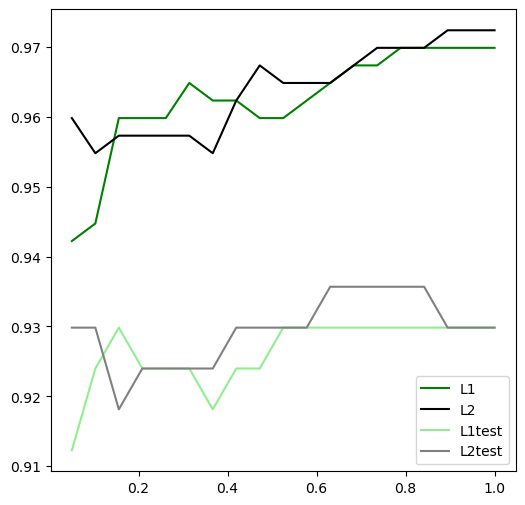

In [11]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
        lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
        lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
        lrl1 = lrl1.fit(Xtrain,Ytrain)
        l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
        l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
        lrl2 = lrl2.fit(Xtrain,Ytrain)
        l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
        l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
        plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.show()

In [14]:
LR_ = LR(solver = 'liblinear', C=0.8, random_state = 420)
cross_val_score(LR_,X,y,cv=10).mean()

0.9508145363408522

In [15]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
X_embedded.shape

(569, 9)

In [16]:
cross_val_score(LR_,X_embedded,y,cv=10).mean()

0.9368107769423559

(0.0, 30)
(0.1021431183124225, 17)
(0.204286236624845, 12)
(0.3064293549372675, 10)
(0.40857247324969, 8)
(0.5107155915621124, 8)
(0.612858709874535, 5)
(0.7150018281869575, 5)
(0.81714494649938, 5)
(0.9192880648118025, 5)
(1.0214311831242249, 5)
(1.1235743014366475, 4)
(1.22571741974907, 3)
(1.3278605380614925, 2)
(1.430003656373915, 2)
(1.5321467746863375, 1)
(1.63428989299876, 1)
(1.7364330113111823, 1)
(1.838576129623605, 1)
(1.9407192479360273, 1)


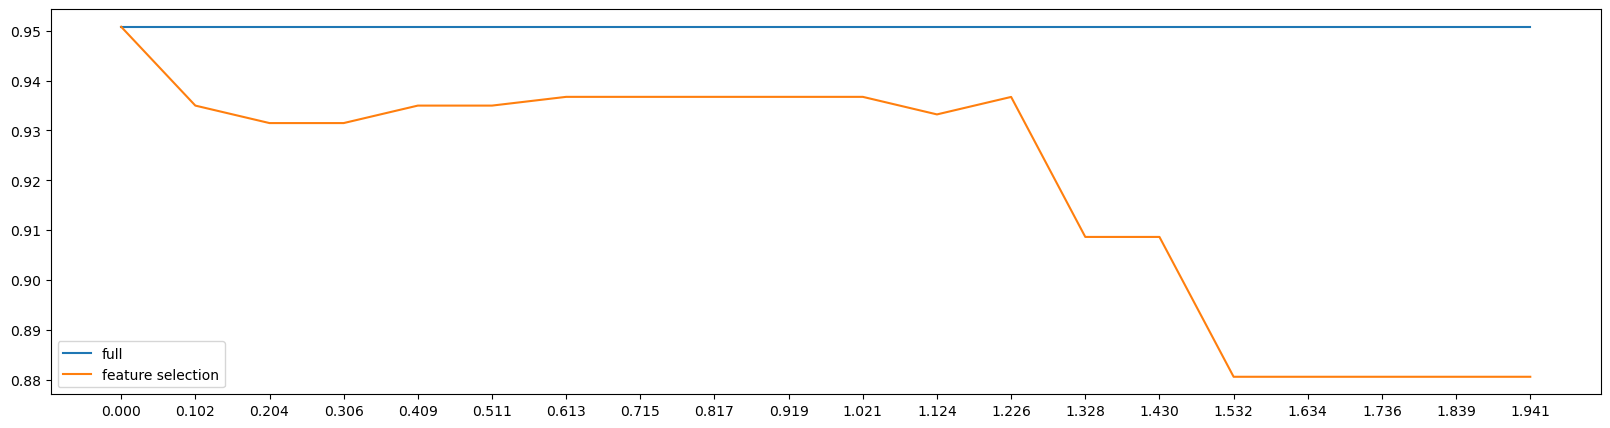

In [17]:
fullx = []
fsx = []
threshold = np.linspace(0,abs(LR_.fit(X,y).coef_).max(),20)
k = 0
for i in threshold:
    X_embedded = SelectFromModel(LR_, threshold = i).fit_transform(X,y)
    fullx.append(cross_val_score(LR_,X,y,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k += 1
    
plt.figure(figsize=[20,5])
plt.plot(threshold,fullx,label = 'full')
plt.plot(threshold,fsx,label = 'feature selection')
plt.xticks(threshold)
plt.legend()
plt.show()

0.9561090225563911 7.01


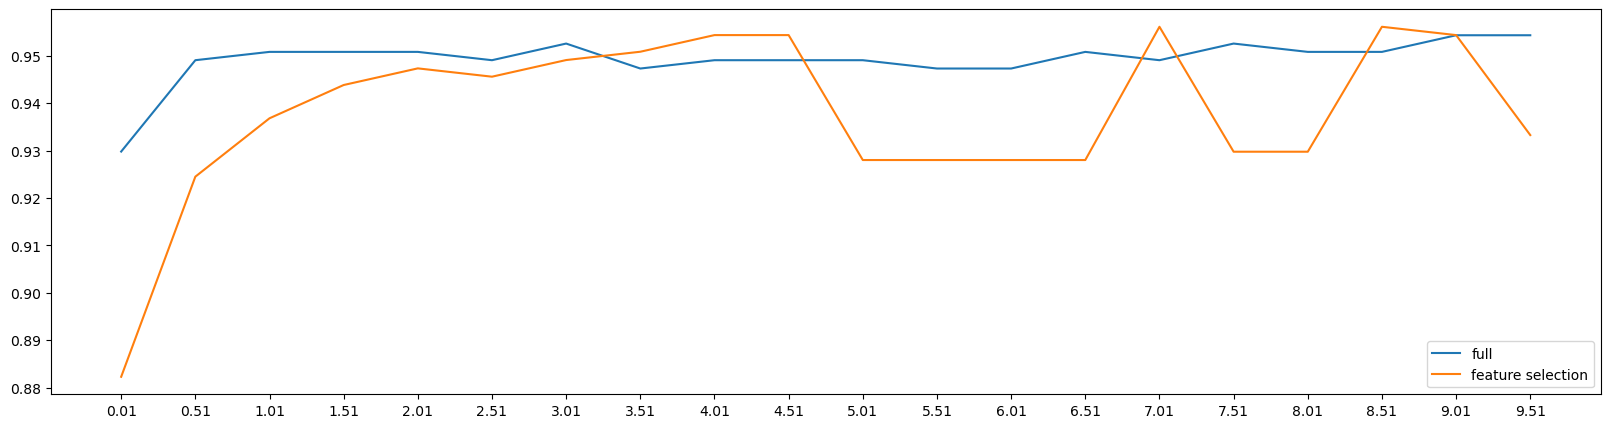

In [20]:
fullx = []
fsx = []
c = np.arange(0.01,10.01,0.5)
for i in c:
    LR_ = LR(solver = 'liblinear', C=i, random_state = 420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_, norm_order = 1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
print(max(fsx),c[fsx.index(max(fsx))])
    
plt.figure(figsize=[20,5])
plt.plot(c,fullx,label = 'full')
plt.plot(c,fsx,label = 'feature selection')
plt.xticks(c)
plt.legend()
plt.show()

0.9561090225563911 6.069999999999999


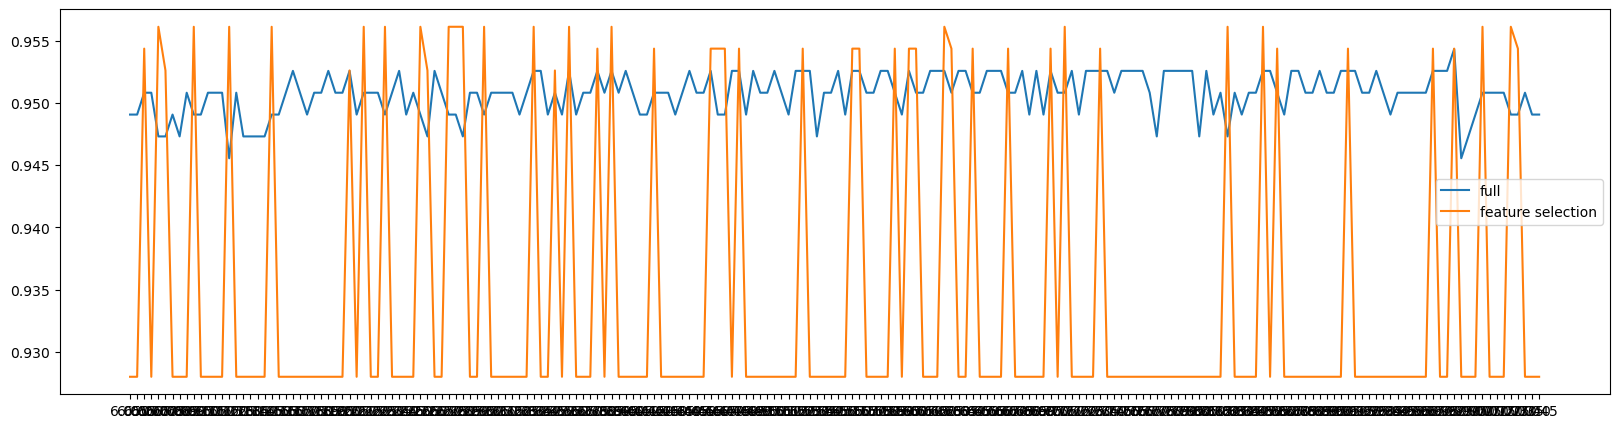

In [21]:
fullx = []
fsx = []
c = np.arange(6.05,7.05,0.005)
for i in c:
    LR_ = LR(solver = 'liblinear', C=i, random_state = 420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_, norm_order = 1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())
print(max(fsx),c[fsx.index(max(fsx))])
    
plt.figure(figsize=[20,5])
plt.plot(c,fullx,label = 'full')
plt.plot(c,fsx,label = 'feature selection')
plt.xticks(c)
plt.legend()
plt.show()

In [22]:
LR_ = LR(solver = 'liblinear', C=6.069999999999999, random_state = 420)
cross_val_score(LR_,X,y,cv=10).mean()

0.9473057644110275

In [23]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
cross_val_score(LR_,X_embedded,y,cv=10).mean()

0.9561090225563911

In [24]:
X_embedded.shape

(569, 11)

In [30]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
        lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
        lrl2 = lrl2.fit(Xtrain,Ytrain)
        l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
        l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
l2test

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.8362573099415205,
 0.9181286549707602,
 0.935672514619883,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088]

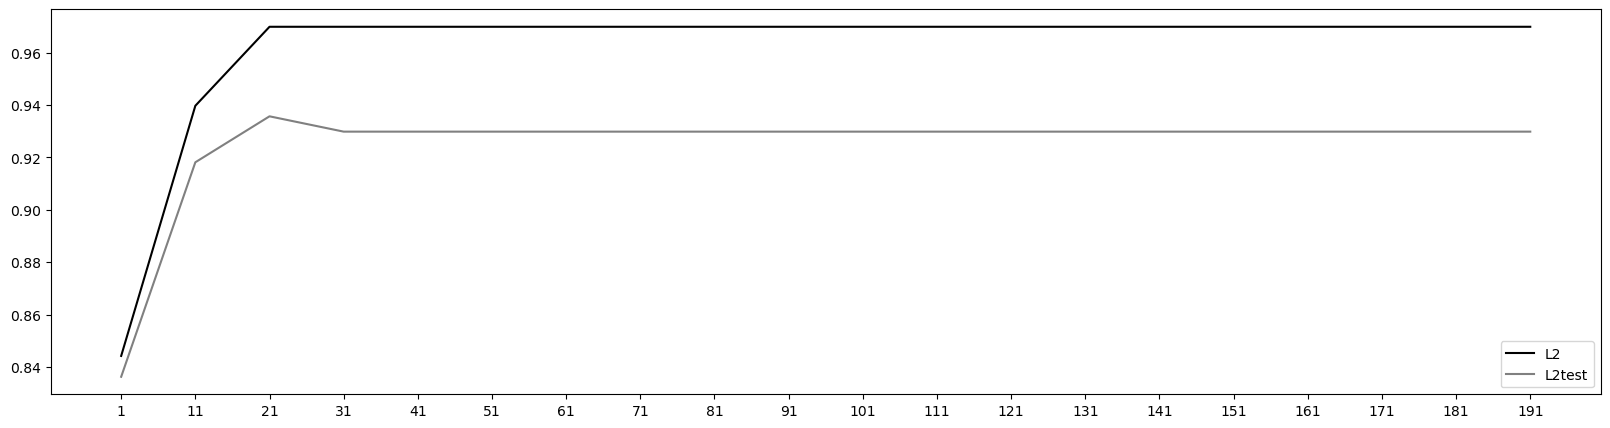

In [32]:
graph = [l2,l2test]
color = ['black','gray']
label = ['L2','L2test']
plt.figure(figsize=(20,5))
for i in range(len(graph)):
        plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [34]:
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([25], dtype=int32)

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()

In [36]:
# OVR:one vs rest MVM:many vs many
for mclass in ('multinomial','ovr'):
    lr0 = LR(solver="sag",max_iter=1000,random_state = 42,multi_class = mclass).fit(iris.data,iris.target)
    print('training score: %.3f (%s)'%(lr0.score(iris.data,iris.target),mclass))

training score: 0.980 (multinomial)
training score: 0.953 (ovr)


C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
